In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
import pandas as pd

data=[]
basepath='/content/drive/MyDrive/Workshop/dataset'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=cv2.imread(file.path)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            #print(features)

In [4]:
print(data)

[[247.78895555555556, 240.56542222222222, 201.02937777777777, 'lemon'], [233.148176, 226.423316, 175.492492, 'lemon'], [249.62398333333334, 219.08794722222223, 163.4299861111111, 'lemon'], [240.681875, 220.37140694444443, 163.51342777777776, 'lemon'], [239.03005277777777, 221.49526111111112, 166.0184111111111, 'lemon'], [240.67782777777776, 220.3668076388889, 163.5342, 'lemon'], [239.0075361111111, 221.49644166666667, 166.01748333333333, 'lemon'], [251.5780482041588, 233.0009640831758, 168.173213610586, 'lemon'], [247.7027111111111, 240.56435555555555, 200.9878111111111, 'lemon'], [249.3172972222222, 219.0890638888889, 163.4220388888889, 'lemon'], [243.80198208073736, 229.5385286518048, 197.48817127325196, 'lemon'], [238.90226907271753, 231.64895876759374, 171.97953268616124, 'lemon'], [239.69084947839048, 220.85893691008445, 159.57828117237952, 'lemon'], [240.57896296296298, 220.28397037037038, 163.49147654320987, 'lemon'], [238.354212345679, 229.35806419753087, 183.05447901234567, 'l

In [5]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

In [6]:
df = pd.read_csv('curdata.csv')
print(df)

             R           G           B  class
0   247.788956  240.565422  201.029378  lemon
1   233.148176  226.423316  175.492492  lemon
2   249.623983  219.087947  163.429986  lemon
3   240.681875  220.371407  163.513428  lemon
4   239.030053  221.495261  166.018411  lemon
5   240.677828  220.366808  163.534200  lemon
6   239.007536  221.496442  166.017483  lemon
7   251.578048  233.000964  168.173214  lemon
8   247.702711  240.564356  200.987811  lemon
9   249.317297  219.089064  163.422039  lemon
10  243.801982  229.538529  197.488171  lemon
11  238.902269  231.648959  171.979533  lemon
12  239.690849  220.858937  159.578281  lemon
13  240.578963  220.283970  163.491477  lemon
14  238.354212  229.358064  183.054479  lemon
15  245.908803  231.574330  192.359725  lemon
16  232.690826  232.248194  170.528451  lemon
17  227.156801  211.099374  143.477238  lemon
18  248.171618  227.867835  156.137037  lemon
19  242.314348  217.121612  148.907721  lemon
20  230.440073  228.037713  165.25

In [7]:
lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

In [8]:
print(lX)

             R           G           B  class
0   247.788956  240.565422  201.029378  lemon
1   233.148176  226.423316  175.492492  lemon
2   249.623983  219.087947  163.429986  lemon
3   240.681875  220.371407  163.513428  lemon
4   239.030053  221.495261  166.018411  lemon
5   240.677828  220.366808  163.534200  lemon
6   239.007536  221.496442  166.017483  lemon
7   251.578048  233.000964  168.173214  lemon
8   247.702711  240.564356  200.987811  lemon
9   249.317297  219.089064  163.422039  lemon
10  243.801982  229.538529  197.488171  lemon
11  238.902269  231.648959  171.979533  lemon
12  239.690849  220.858937  159.578281  lemon
13  240.578963  220.283970  163.491477  lemon
14  238.354212  229.358064  183.054479  lemon
15  245.908803  231.574330  192.359725  lemon
16  232.690826  232.248194  170.528451  lemon
17  227.156801  211.099374  143.477238  lemon
18  248.171618  227.867835  156.137037  lemon
19  242.314348  217.121612  148.907721  lemon
20  230.440073  228.037713  165.25

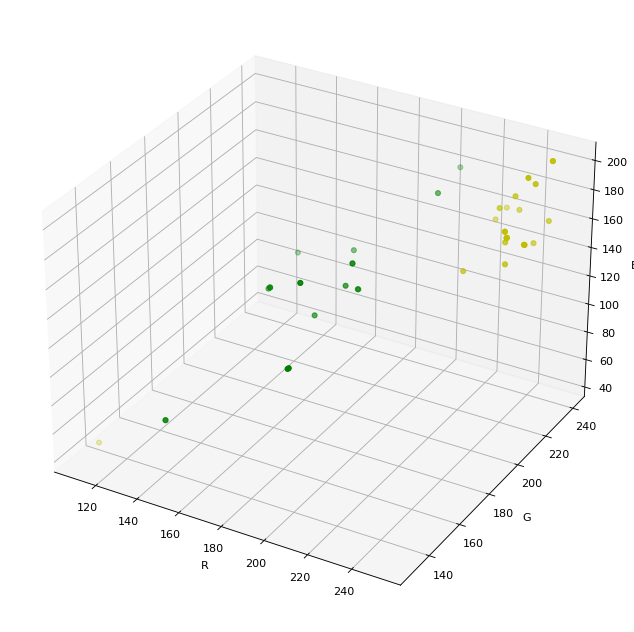

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[247.78895556 240.56542222 201.02937778]
 [233.148176   226.423316   175.492492  ]
 [249.62398333 219.08794722 163.42998611]
 [240.681875   220.37140694 163.51342778]
 [239.03005278 221.49526111 166.01841111]
 [240.67782778 220.36680764 163.5342    ]
 [239.00753611 221.49644167 166.01748333]
 [251.5780482  233.00096408 168.17321361]
 [247.70271111 240.56435556 200.98781111]
 [249.31729722 219.08906389 163.42203889]
 [243.80198208 229.53852865 197.48817127]
 [238.90226907 231.64895877 171.97953269]
 [239.69084948 220.85893691 159.57828117]
 [240.57896296 220.28397037 163.49147654]
 [238.35421235 229.3580642  183.05447901]
 [245.90880329 231.57432967 192.35972475]
 [232.69082632 232.24819396 170.52845126]
 [227.15680079 211.09937407 143.47723795]
 [248.17161814 227.86783521 156.13703704]
 [242.31434826 217.12161194 148.90772139]
 [230.44007312 228.03771261 165.25971626]
 [110.10658718 135.74249379  44.46942871]
 [165.78528443 171.09423945 143.60087474]
 [201.57220483 178.40579232 150.47

In [11]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',alpha=1e-5,activation='relu',hidden_layer_sizes=(20,10,5),random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[8 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

Enter image path : /content/drive/MyDrive/Image_processing_basics_images/dataset/lemon/1439-2.jpg
It is a lemon


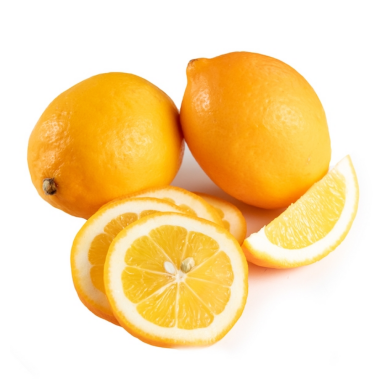

In [ ]:

import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=cv2.imread(image)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
features=np.mean(im, axis=(0, 1)).tolist()

yp=clf.predict([features])
yp=le.inverse_transform(yp)

print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()